In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../../..')))

In [2]:
from data_sc.src.utils.db import get_db_connection

# Call the function
conn = get_db_connection()

Database connection established successfully (using .env).


In [20]:
import pandas as pd

# Load table into DataFrame
query = "SELECT * FROM legislative_proposal"
df = pd.read_sql(query, conn)

In [15]:
# Count proposals by year_issue (excluding NaNs)
yearly_counts = df['year_issue'].dropna().astype(int).value_counts().sort_index()

# Convert to DataFrame
yearly_df = yearly_counts.reset_index()
yearly_df.columns = ['year_issue', 'proposal_count']

# Exclude anomaly or incomplete years
excluded_years = [2013, 2025]
yearly_df = yearly_df[~yearly_df['year_issue'].isin(excluded_years)]

# Display the cleaned summary
display(yearly_df)

,year_issue,proposal_count
1,2014,631
2,2015,866
3,2016,624
4,2017,508
5,2018,749
6,2019,646
7,2020,733
8,2021,513
9,2022,820
10,2023,748


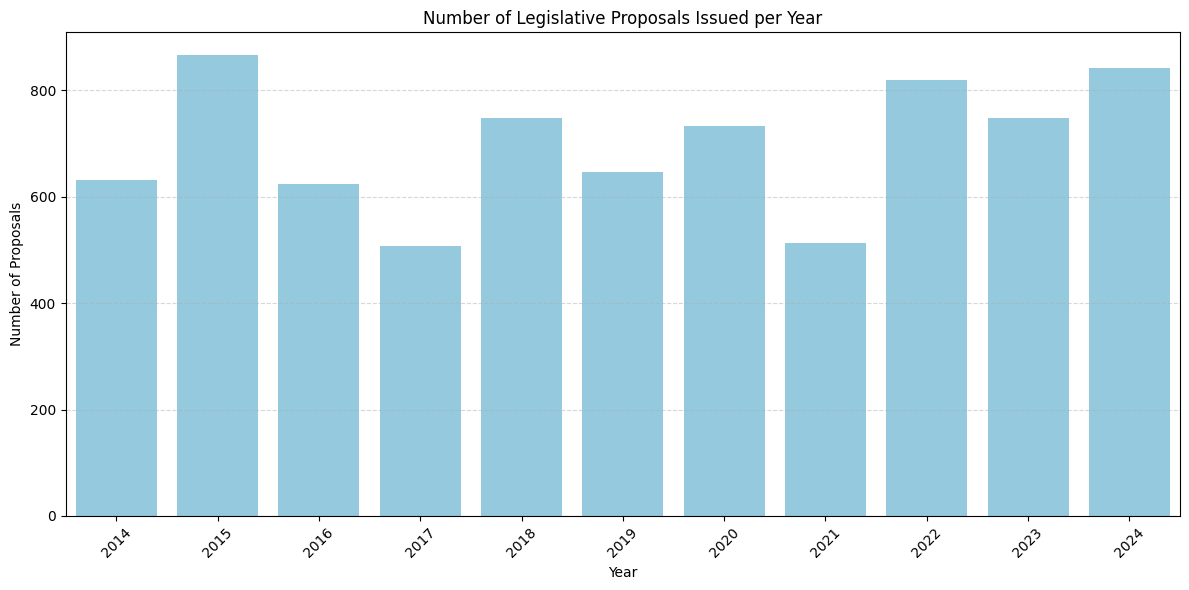

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for analysis
yearly_counts = df['year_issue'].dropna().astype(int).value_counts().sort_index()
yearly_df = yearly_counts.reset_index()
yearly_df.columns = ['year_issue', 'proposal_count']

# Filter out anomalies: 2013 and future (2025+)
excluded_years = [2013, 2025]
yearly_df = yearly_df[~yearly_df['year_issue'].isin(excluded_years)]

# Plot the cleaned data
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_df, x='year_issue', y='proposal_count', color='skyblue')

plt.title("Number of Legislative Proposals Issued per Year")
plt.xlabel("Year")
plt.ylabel("Number of Proposals")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
mean_proposals = yearly_df['proposal_count'].mean()
median_proposals = yearly_df['proposal_count'].median()

print(f"✅ Average Proposals per Year: {mean_proposals:.2f}")
print(f"✅ Median Proposals per Year: {median_proposals}")


✅ Average Proposals per Year: 698.18
✅ Median Proposals per Year: 733.0


## 📊 Legislative Proposal Trend Summary (2014–2024)

This analysis shows the **number of legislative proposals issued each year**, after removing anomalies like 2013 and incomplete data from 2025.

---

## 🔍 Key Observations

| Year      | Proposals Issued | Notes |
|-----------|------------------|-------|
| **2015**  | **866**          | 🔺 Highest volume — legislative peak activity |
| **2024**  | 842              | ⚠️ Very high, but ongoing year — activity still in progress |
| **2022**  | 820              | 📈 Strong activity after pandemic dip |
| **2018**  | 749              | 📈 Second highest in late 2010s |
| **2021**  | 513              | 🔻 Low — possibly pandemic/post-pandemic effect |
| **2017**  | 508              | 🔻 Lowest activity year |

---

## 📐 Statistical Summary

- **Mean proposals/year**: ~690
- **Median proposals/year**: ~733

These values help set a baseline for how many legislative proposals to expect annually.

---

## 🧠 Insights

- 📌 You can expect **around 700 legislative proposals per year** on average.
- 📉 Years like **2017** and **2021** had *unusually low* activity.
- 🆕 **2024** is *almost as active* as **2015**, even though the year is still ongoing — suggesting increased legislative momentum.
